# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
# 1.1

import pandas as pd
import numpy as np
airbnb = pd.read_csv("airbnb_NYC.csv", encoding="latin-1")
print(airbnb['Price'].head())
print(airbnb['Price'].dtype)

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object
object


In [3]:
airbnb["Price_clean"] = (airbnb["Price"].astype(str).str.replace(",", "", regex=False).str.replace("$", "", regex=False).replace("nan", np.nan))
airbnb["Price_clean"] = pd.to_numeric(airbnb["Price_clean"], errors="coerce")
print(airbnb["Price_clean"].head())
print(airbnb["Price_clean"].dtype)

0    145
1     37
2     28
3    199
4    549
Name: Price_clean, dtype: int64
int64


In [4]:
# How many missing values do you end up with?
airbnb["Price_clean"].isna().sum()

np.int64(0)

In [ ]:
# 1.2

mn = pd.read_csv("mn_police_use_of_force.csv")
mn["subject_injury"].value_counts(dropna=False)

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64

In [6]:
mn["subject_injury_clean"] = (
    mn["subject_injury"]
    .str.strip()
    .str.title()
    .replace("Nan", np.nan)
)

# What proportion of the values are missing?
missing_prop = mn["subject_injury_clean"].isna().sum() / len(mn)
print(missing_prop)

0.7619342359767892


In [7]:
# Crosstabulating

pd.crosstab(mn["force_type"], mn["subject_injury_clean"], dropna=False, normalize="index")
mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")
mn["subject_injury_clean"].value_counts()

subject_injury_clean
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64

**Are there patterns?**

Yes, there are. When cross-tabulating, it showed that the missing values are not evenly distributed acorss force types. So it suggests that injury status is more or less likely to be unreported in certain types of encounters. 

In [ ]:
# 1.3

metabric = pd.read_csv("metabric.csv")
metabric["Overall Survival Status"].value_counts(dropna=False)

Overall Survival Status
1:DECEASED    768
0:LIVING      575
Name: count, dtype: int64

In [9]:
metabric["Overall_Survival_Binary"] = metabric["Overall Survival Status"].map(
    {"1:DECEASED": 0, "0:LIVING": 1}
)

metabric["Overall_Survival_Binary"].value_counts()

Overall_Survival_Binary
0    768
1    575
Name: count, dtype: int64

In [ ]:
# 1.4

airbnb["Review Scores Rating"].dtype

dtype('float64')

In [11]:
airbnb["Review Scores Rating"].isna().sum()
len(airbnb  )

30478

In [12]:
median_rating = airbnb["Review Scores Rating"].median()
median_rating

np.float64(94.0)

In [13]:
airbnb["Review Scores Rating Imputed"] = airbnb["Review Scores Rating"].fillna(median_rating)
airbnb["Review Scores Rating Imputed"].isna().sum()

np.int64(0)

**Why might this negatively impact results**

Median imputation may bias results because it treats missing reviews as average, even though listings without reviews may be mean something different

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [69]:
!pip install xlrd openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
# 2.1
sharks = pd.read_excel("GSAF5.xls")
sharks.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# 2.2

print(sharks.isna().sum())
sharks_clean = sharks.dropna(axis =1, how="all")
print(sharks.shape)
print(sharks_clean.shape)

Date                 0
Year                 2
Type                18
Country             50
State              487
Location           567
Activity           583
Name               218
Sex                578
Age               2994
Injury              35
Fatal Y/N          561
Time              3527
Species           3131
Source              20
pdf                275
href formula       280
href               278
Case Number        276
Case Number.1      277
original order     275
Unnamed: 21       7073
Unnamed: 22       7072
dtype: int64
(7074, 23)
(7074, 23)


**2.3**

Each observation represents one shark attack. Since each row is a real incident, I tried to keep the observations whenever possible and focused on cleaning individual variables instead of dropping full rows, because doing so could remove or skew meaningful information.

In [22]:
# 2.4

print(sharks["Year"].head(10))
sharks["Year"].dtype

0    2026.0
1    2026.0
2    2026.0
3    2026.0
4    2026.0
5    2026.0
6    2026.0
7    2026.0
8    2026.0
9    2026.0
Name: Year, dtype: float64


dtype('float64')

In [24]:
sharks["Year_clean"] = pd.to_numeric(sharks["Year"], errors="coerce")
sharks["Year_clean"].describe()

count    7072.000000
mean     1936.004242
std       270.672015
min         0.000000
25%      1948.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year_clean, dtype: float64

In [26]:
sharks_1940 = sharks[sharks["Year_clean"] >= 1940]
sharks_1940["Year_clean"].min()
attacks_by_year = sharks_1940.groupby("Year_clean").size()
attacks_by_year.head()

Year_clean
1940.0    24
1941.0    27
1942.0    41
1943.0    28
1944.0    31
dtype: int64

<Axes: title={'center': 'Number of Shark Attacks per Year since 1940'}, xlabel='Year_clean'>

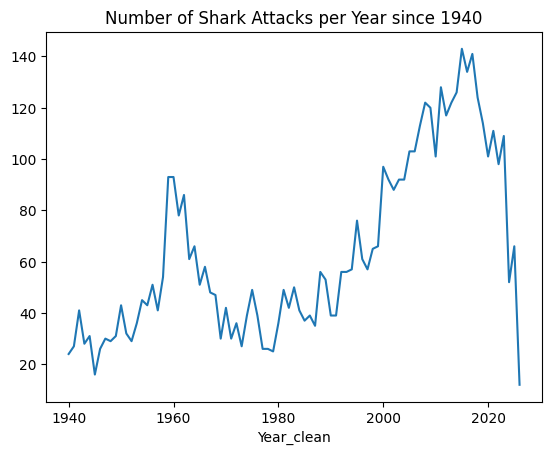

In [27]:
attacks_by_year.plot(kind="line", title="Number of Shark Attacks per Year since 1940") 

Although the number of shark attacks fluctuates over time, the overall trend since 1940 is upward, with noticeably higher counts in later decades compared to earlier ones.

In [ ]:
# 2.5

sharks["Age"].dtype
sharks["Age_clean"] = pd.to_numeric(sharks["Age"], errors="coerce")
sharks["Age_clean"].isna().sum()

np.int64(3149)

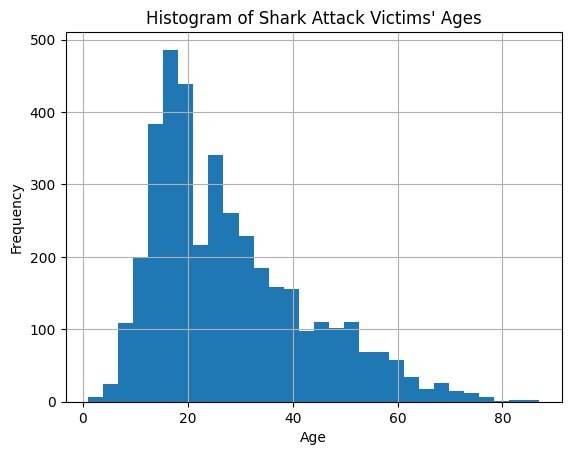

In [33]:
import matplotlib.pyplot as plt
sharks["Age_clean"].hist(bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Shark Attack Victims' Ages")
plt.show()

In [36]:
# 2.6

sharks["Type"].value_counts(dropna=False)
sharks["Type_clean"] = sharks["Type"].str.strip().str.title()
sharks["Type_clean"] = sharks["Type_clean"].replace({"Unprovoked": "Unprovoked", "Provoked": "Provoked"})
sharks["Type_clean"] = sharks["Type_clean"].where(sharks["Type_clean"].isin(["Unprovoked", "Provoked"]), "Unknown")
sharks["Type_clean"].value_counts()

Type_clean
Unprovoked    5226
Unknown       1204
Provoked       644
Name: count, dtype: int64

In [37]:
type_counts = sharks["Type_clean"].value_counts()
prop_unprovoked = type_counts["Unprovoked"] / type_counts.sum()
prop_unprovoked

np.float64(0.7387616624257846)

In [40]:
# 2.7

sharks["Fatal Y/N"].value_counts(dropna=False)
sharks["Fatal Y/N Clean"] = sharks["Fatal Y/N"].str.strip().str.upper()
sharks["Fatal Y/N Clean"] = sharks["Fatal Y/N Clean"].where(sharks["Fatal Y/N Clean"].isin(["Y", "N"]), "Unknown")
sharks["Fatal Y/N Clean"].value_counts()

Fatal Y/N Clean
N          4942
Y          1489
Unknown     643
Name: count, dtype: int64

In [41]:
# 2.8

pd.crosstab(sharks["Type_clean"], sharks["Fatal Y/N Clean"], normalize="index")

Fatal Y/N Clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unknown,0.372924,0.460963,0.166113
Unprovoked,0.742250,0.015117,0.242633


In [42]:
fatal_by_type = pd.crosstab(sharks["Type_clean"], sharks["Fatal Y/N Clean"], normalize="index")
fatal_by_type.loc[["Provoked", "Unprovoked"]]


Fatal Y/N Clean,N,Unknown,Y
Type_clean,,,
Provoked,0.953416,0.013975,0.032609
Unprovoked,0.742250,0.015117,0.242633


Unprovoked attacks are more likely to be fatal than provoked attacks. This is interesting because that is not what I thought before. Provoked attacks could be more fatal because the victim is not aware or prepared for the attack. 

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**3.1**: This paper is about data tidying and what framework/structure is the best way to tidy data in order to analyze data as efficiently as possible. 

**3.2**: The "tidy data standard" is intended to give data scientists a clear way to organize datasets so that all the different tools that they use work together smoothly

**3.3**: The first quote means that datasets can get disorganized in various way despite them following the same structure. 

The second quote menas that it's easy to identify observations and variables, but hard to define them. 

**3.4**: Values are the individual data points.

Variables are collections of values measuring the same attribute. 

Observations are the values measured accross variables for one unit. 

**3.5**: Tidy Data is when each variable is a column, each observation is a row, and each type of observational unit has its own table. 

**3.6**: 

1. Variables in headers
2. Multiple variables in one column
3. Variables split across rows and columns
4. Multiple observational units in one table
5. One unit spread across tables

Table 4 is messy because it has 3 variables: religion, income, and frequency. 

"Melting" data is essentially stacking it. It turns the column names into rows so that variables can be more consistent. 

**3.7**: Table 11 is messy because days are stored across many different columns, which makes the table hard to work with. Table 12 is tidy because the each row corresponds to a single day with clear variables, making it "molten". 


**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

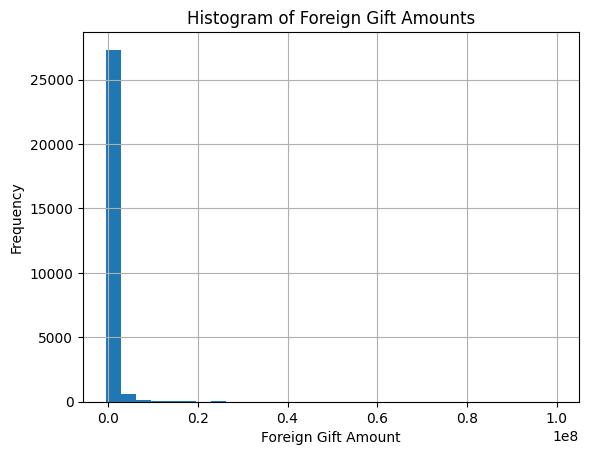

In [44]:
# 4.1
gifts = pd.read_csv("ForeignGifts_edu.csv")

# 4.2
gifts["Foreign Gift Amount"].hist(bins=30)
plt.xlabel("Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Foreign Gift Amounts")
plt.show()

In [46]:
# 4.3
gift_count = gifts["Gift Type"].value_counts(dropna=False)
gifts_proportion = gift_count / gift_count.sum()
print(gifts_proportion)

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


In [54]:
gifts.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [ ]:
# 4.4 
top_countries_count = gifts.groupby("Country of Giftor").size().sort_values(ascending=False).head(15)
top_countries_count

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
dtype: int64

In [57]:
top_countries_amount = gifts.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
top_countries_amount

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64

In [ ]:
# 4.5

top_institutions_amount = gifts.groupby("Institution Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
top_institutions_amount

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64

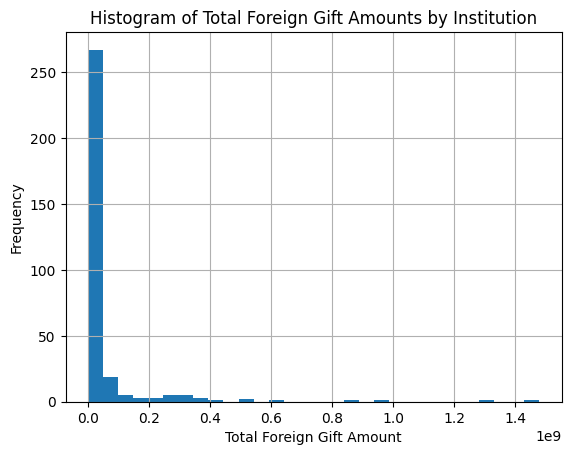

In [60]:
Institution_totals = gifts.groupby("Institution Name")["Foreign Gift Amount"].sum()
Institution_totals.hist(bins=30)
plt.xlabel("Total Foreign Gift Amount")
plt.ylabel("Frequency")
plt.title("Histogram of Total Foreign Gift Amounts by Institution")
plt.show()

In [61]:
# 4.6

top_giftors = gifts.groupby("Giftor Name")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
top_giftors

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [67]:
# 5.1
college = pd.read_csv("college_completion.csv")

#5.2
print(college.shape)
college.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [68]:
# 5.3
pd.crosstab(college["control"], college["level"], normalize="index")

level,2-year,4-year
control,,
Private for-profit,0.468750,0.531250
Private not-for-profit,0.054487,0.945513
Public,0.594352,0.405648


Private nonprofit schools are mostly four-year, public schools skew two-year, and for-profit institutions are split between the two.

<Axes: title={'center': 'Distribution of Graduation Rates at 100th Percentile'}, ylabel='Density'>

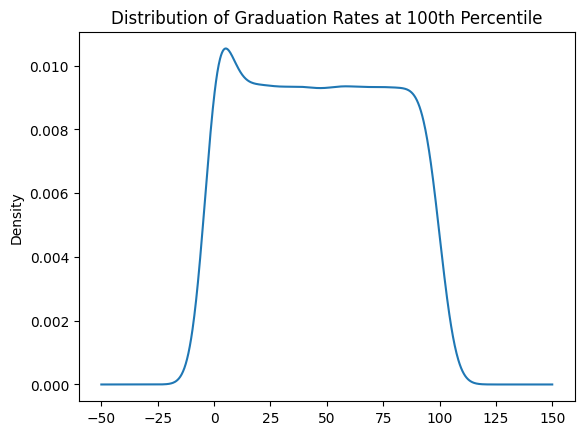

In [70]:
# 5.4 
college["grad_100_percentile"].plot(kind = "kde", title = "Distribution of Graduation Rates at 100th Percentile")

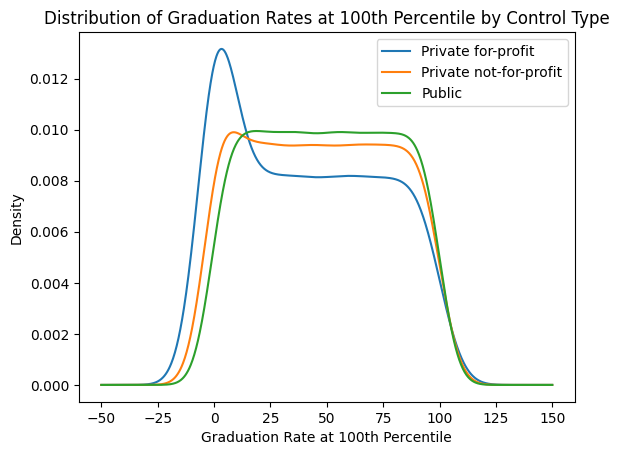

In [71]:
college.groupby("control")["grad_100_percentile"].plot(kind="kde", title="Distribution of Graduation Rates at 100th Percentile by Control Type", legend=True)
plt.xlabel("Graduation Rate at 100th Percentile")
plt.show()

Private not-for-profit institutions seem to have the most favorable graduation rates even though publisc institutions also show high graduation rates. 

,grad_100_percentile,aid_value
grad_100_percentile,1.000000,0.282433
aid_value,0.282433,1.000000


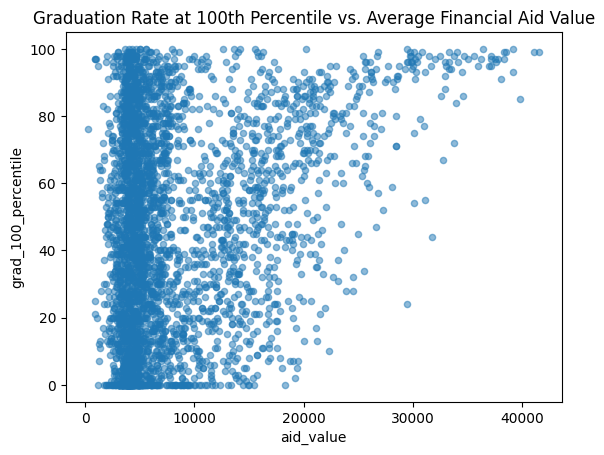

In [72]:
# 5.5 

college[["grad_100_percentile", "aid_value"]].dropna().plot(kind="scatter", x="aid_value", y="grad_100_percentile", title="Graduation Rate at 100th Percentile vs. Average Financial Aid Value", alpha=0.5)

college[["grad_100_percentile", "aid_value"]].cov()
college[["grad_100_percentile", "aid_value"]].corr()

There's a slight upward trend, but the plot is incredibly noisy. The correlation of 0.28 supports the positive relationship claim, but it is not strong. 

Public
                     grad_100_percentile     aid_value
grad_100_percentile           850.826623  1.225261e+04
aid_value                   12252.614874  4.668472e+06
                     grad_100_percentile  aid_value
grad_100_percentile             1.000000   0.194411
aid_value                       0.194411   1.000000

Private not-for-profit
                     grad_100_percentile     aid_value
grad_100_percentile           924.669479  1.384041e+05
aid_value                  138404.098371  5.948465e+07
                     grad_100_percentile  aid_value
grad_100_percentile             1.000000   0.590138
aid_value                       0.590138   1.000000

Private for-profit
                     grad_100_percentile     aid_value
grad_100_percentile          1055.313497  1.162718e+04
aid_value                   11627.181874  2.048899e+06
                     grad_100_percentile  aid_value
grad_100_percentile             1.000000   0.250048
aid_value                       0.2500

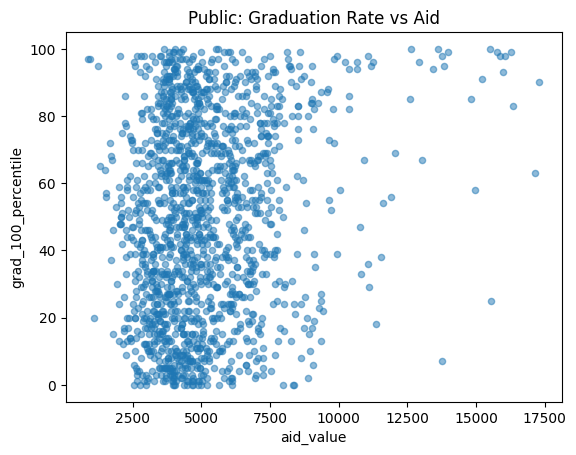

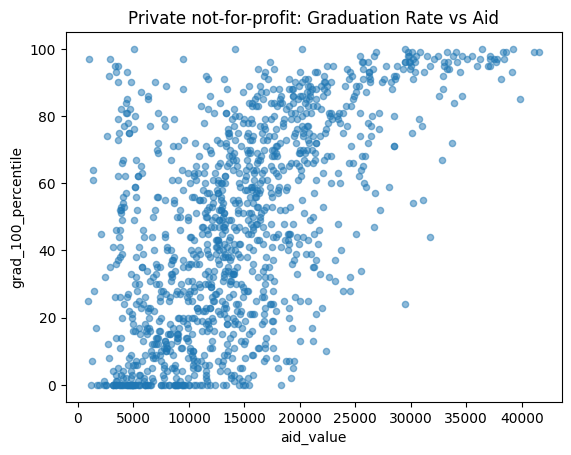

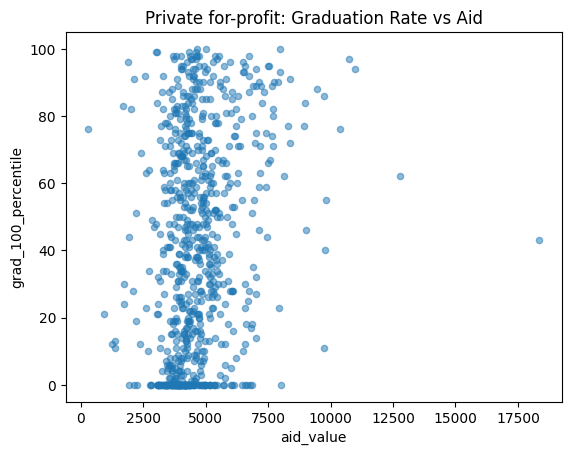

In [77]:
for i in college["control"].unique():
    subset = college[college["control"] == i][["grad_100_percentile", "aid_value"]].dropna()
    
    subset.plot(
        kind="scatter",
        x="aid_value",
        y="grad_100_percentile",
        alpha=0.5,
        title=f"{i}: Graduation Rate vs Aid"
    )
    
    print(i)
    print(subset.cov())
    print(subset.corr())
    print()


Private not-for-profit institutions' aid seem to vary positively with graduation rates

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [78]:
# 7.1
ames = pd.read_csv("ames_prices.csv")
ames

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,1003,142500,80,RL,37.0,7937,Pave,NaN,...,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal
2926,2927,923276100,902,131000,20,RL,NaN,8885,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal
2927,2928,923400125,970,132000,85,RL,62.0,10441,Pave,NaN,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
2928,2929,924100070,1389,170000,20,RL,77.0,10010,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal


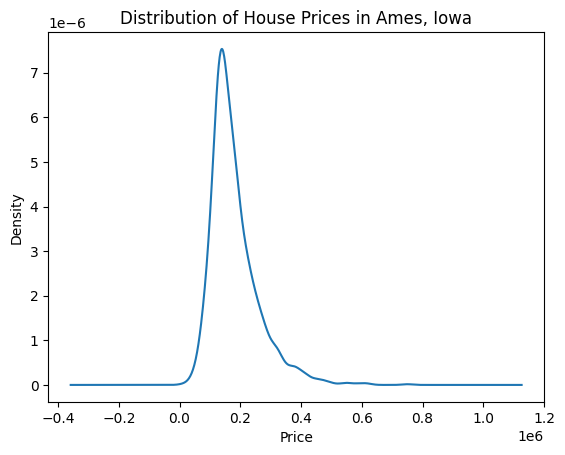

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: price, dtype: float64

In [79]:
# 7.2

ames["price"].plot(kind = "kde", title = "Distribution of House Prices in Ames, Iowa")
plt.xlabel("Price")
plt.show()

ames["price"].describe()

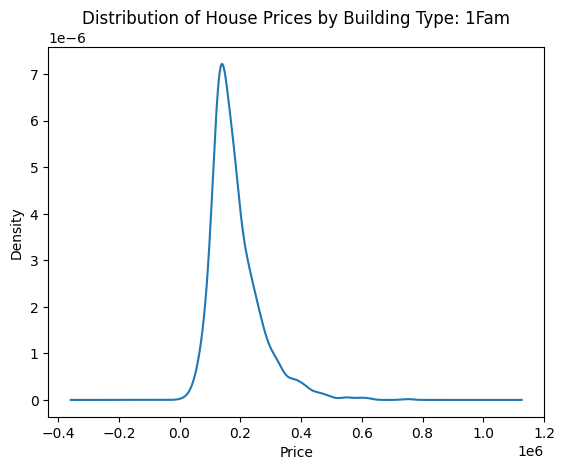

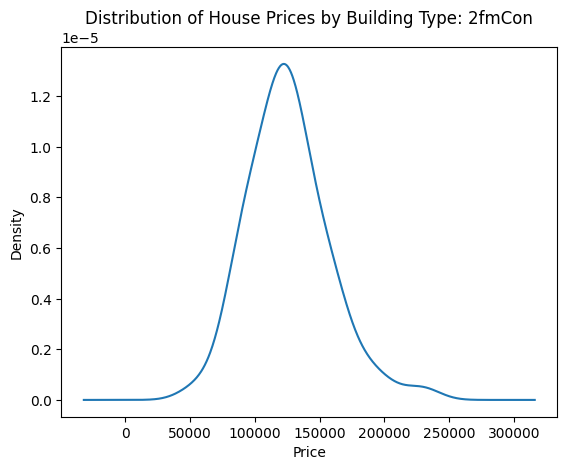

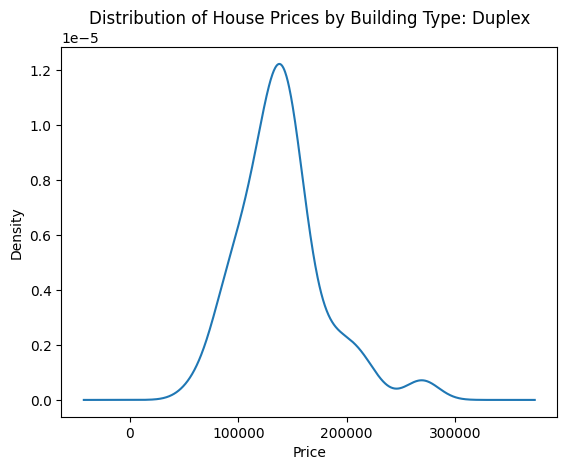

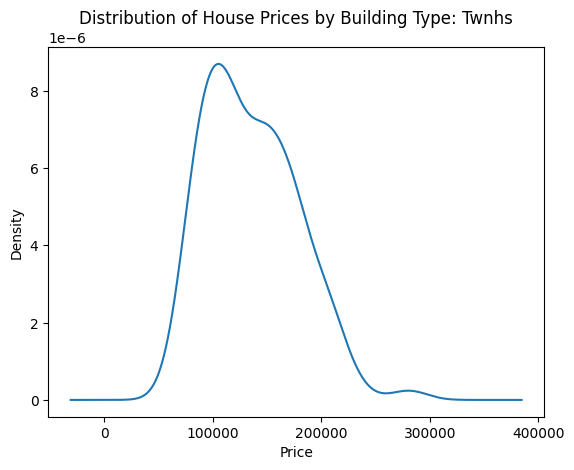

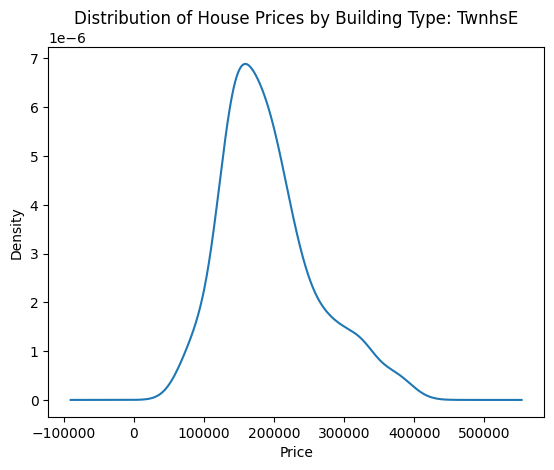

/tmp/ipykernel_38524/3955570992.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


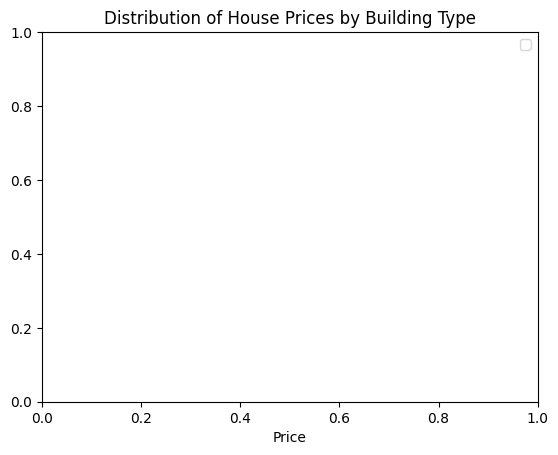

In [85]:
for btype, group in ames.groupby("Bldg.Type"):
    group["price"].plot(kind="kde", title=f"Distribution of House Prices by Building Type: {btype}")
    plt.xlabel("Price")
    plt.show()

plt.legend()
plt.xlabel("Price")
plt.title("Distribution of House Prices by Building Type")
plt.show()

Single family homes (1Fam) are the most expensive on average and have the highest variance. 

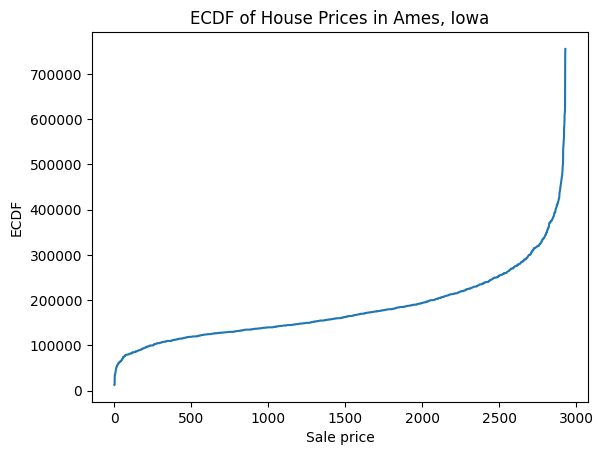

In [88]:
# 7.3 

ames["price"].sort_values().reset_index(drop=True).plot()
plt.xlabel("Sale price")
plt.ylabel("ECDF")
plt.title("ECDF of House Prices in Ames, Iowa")
plt.show()

In [89]:
ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])

0.00     12789.0
0.25    129500.0
0.50    160000.0
0.75    213500.0
1.00    755000.0
Name: price, dtype: float64

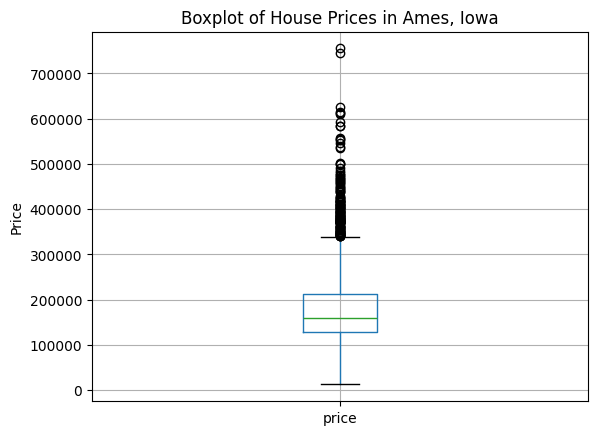

In [90]:
# 7.4

ames.boxplot(column="price")
plt.title("Boxplot of House Prices in Ames, Iowa")
plt.ylabel("Price")
plt.show()

Yes, there are. There are many outliers at the top of the graph indicating that the plot is very skewed to the right. 

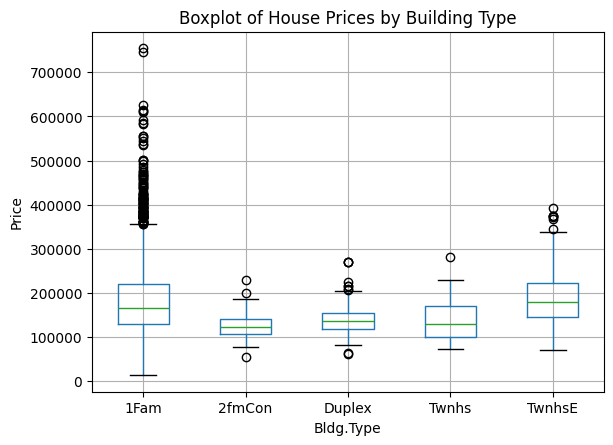

In [91]:
ames.boxplot(column="price", by="Bldg.Type")
plt.title("Boxplot of House Prices by Building Type")
plt.suptitle("")
plt.ylabel("Price")
plt.show()

Single family homes stand out the most since they have the highest prices and variances. They also have the most outliers. Duplexes and interior townhomes have the most similar distributions. 

In [92]:
# 7.5

Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1

ames["dummy"] = ((ames["price"] < (Q1 - 1.5 * IQR)) | (ames["price"] > (Q3 + 1.5 * IQR)))
ames["dummy"].value_counts()

dummy
False    2793
True      137
Name: count, dtype: int64

In [93]:
# 7.6

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

ames["price_winsorized"] = ames["price"].clip(lower=lower, upper=upper)

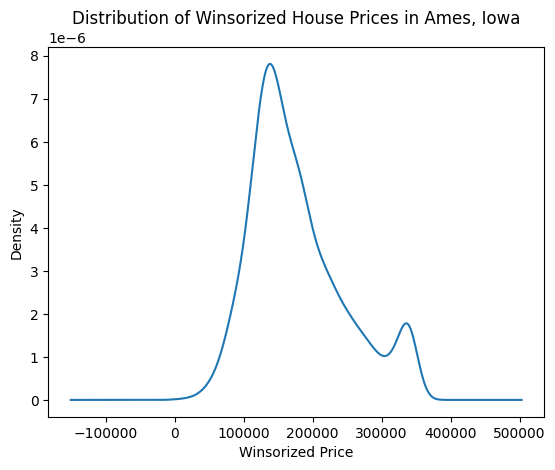

In [94]:
ames["price_winsorized"].plot(kind="kde", title="Distribution of Winsorized House Prices in Ames, Iowa")
plt.xlabel("Winsorized Price")
plt.show()

In [95]:
ames["price_winsorized"].describe()

count      2930.000000
mean     177082.283959
std       67906.837135
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      339500.000000
Name: price_winsorized, dtype: float64

After winsorization, the graph was not as skewed because it reduced the influence of the really large outliers. So the mean and standard deviation decreased, while the median and IQR stayed the same. 